In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 100)

In [2]:
df = pd.read_csv('/home/abhishek/Documents/100-days-of-machine-learning-main/day36-imputing-numerical-data/titanic_toy.csv')


In [3]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [4]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [7]:
X_train.isnull().sum()

Age       148
Fare       36
Family      0
dtype: int64

In [8]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].mean()


In [9]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)


In [10]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
823,27.0,12.475,1,27.0,27.0,12.475000,12.475000
429,32.0,NaN,0,32.0,32.0,32.617597,32.617597
696,44.0,8.050,0,44.0,44.0,8.050000,8.050000
145,19.0,36.750,2,19.0,19.0,36.750000,36.750000
668,43.0,8.050,0,43.0,43.0,8.050000,8.050000


In [11]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2324.2385256705534
Fare Variance after mean imputation:  2324.2385256705534


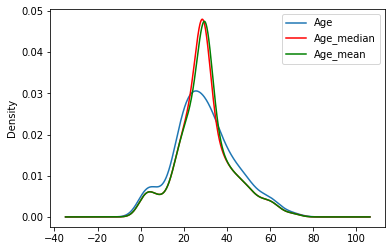

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

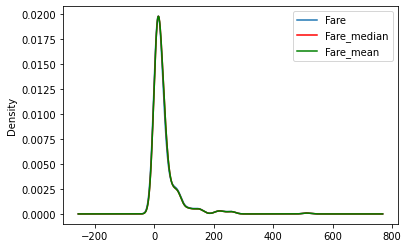

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [14]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,66.665205
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.385048
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,52.788341
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,55.023037
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526


In [15]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.090156
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205499
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.086078
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.089673
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,1.000000
Fare_median,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,1.000000


<AxesSubplot:>

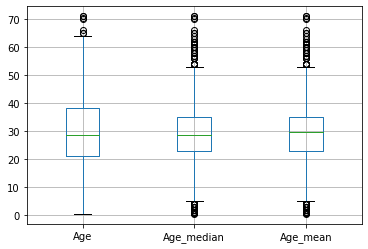

In [16]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<AxesSubplot:>

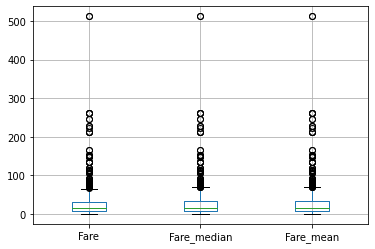

In [17]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()